## COVID-19: Computational Drug Discovery [Exploratory Data Analysis][Part 2]

This an attempt to find an FDA approved compound or molecule that will inhibit the function of Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV2). In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

An Otsogile Onalepelo Project aka Morena!

## Install Rdkit

RDKit is an open source cheminformatics software. It allows us to calculate the molecular decriptors for the compounds for the dataset from part 1 of this project

In [1]:
#!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh --no-check-certificate
#! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
#! conda install -c rdkit rdkit -y

### **Import libraries**

In [2]:
import numpy as np
from rdkit import Chem #allows us to compute the molecular descriptors for the compounds in the dataset that we have
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
#import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')
sns.set_style("darkgrid")
%matplotlib inline

## **Load bioactivity data**

In [3]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

## Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5: tells us the solulibility
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Calculate descriptors**

This custom function lipinski() will accept canonical smiles as input and will calculate Lipinski descriptors for all of them

In [4]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [5]:
df_lipinski = lipinski(df.canonical_smiles)

### Combine Dataframes

Let's take a look at the 2 Dataframes that will be combined.

In [6]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1.0,4.0
1,226.351,3.30451,0.0,5.0
2,334.400,3.26220,0.0,5.0
3,458.375,2.23320,8.0,11.0
4,237.052,2.22770,0.0,2.0
...,...,...,...,...
105,555.516,7.13050,1.0,4.0
106,182.222,3.20850,0.0,1.0
107,259.740,-1.01410,2.0,2.0
108,357.143,1.45040,1.0,5.0


In [7]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,inactive
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
105,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,4360.0,inactive
106,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,1240.0,inactive
107,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],4980.0,inactive
108,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],750.0,active


Now, let's combine the 2 Dataframes

In [8]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [9]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,334.400,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,inactive,458.375,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052,2.22770,0.0,2.0
...,...,...,...,...,...,...,...,...
105,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,4360.0,inactive,555.516,7.13050,1.0,4.0
106,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,1240.0,inactive,182.222,3.20850,0.0,1.0
107,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],4980.0,inactive,259.740,-1.01410,2.0,2.0
108,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],750.0,active,357.143,1.45040,1.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [10]:
def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [11]:
df_combined.standard_value.describe()

count     110.000000
mean     1358.272727
std      1388.661067
min        10.000000
25%       220.000000
50%       825.000000
75%      2065.000000
max      4980.000000
Name: standard_value, dtype: float64

In [12]:
-np.log10( (10**-9)* 100000000 )

1.0

In [13]:
-np.log10( (10**-9)* 10000000000 )

-1.0

See, if we dont cap values when applying the transformation, we get a negative value for larger values

In [14]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.For this dataset though, we have our max value at 4980. So this standardization was not really necessary. However, as before, it might come handy when dealing with other datasets thus why i incoporated it even though it will not make any difference to the dataset we have.

In [15]:
#lets cap the values
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,inactive,458.375,2.23320,8.0,11.0,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,40.0
...,...,...,...,...,...,...,...,...
105,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,inactive,555.516,7.13050,1.0,4.0,4360.0
106,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,inactive,182.222,3.20850,0.0,1.0,1240.0
107,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],inactive,259.740,-1.01410,2.0,2.0,4980.0
108,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],active,357.143,1.45040,1.0,5.0,750.0


In [16]:
df_norm.standard_value_norm.describe()

count     110.000000
mean     1358.272727
std      1388.661067
min        10.000000
25%       220.000000
50%       825.000000
75%      2065.000000
max      4980.000000
Name: standard_value_norm, dtype: float64

Yep! No transformation happened. 😆

In [17]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,inactive,458.375,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
...,...,...,...,...,...,...,...,...
105,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,inactive,555.516,7.13050,1.0,4.0,5.360514
106,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,inactive,182.222,3.20850,0.0,1.0,5.906578
107,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],inactive,259.740,-1.01410,2.0,2.0,5.302771
108,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],active,357.143,1.45040,1.0,5.0,6.124939


In [18]:
df_final.pIC50.describe()

count    110.000000
mean       6.192202
std        0.635679
min        5.302771
25%        5.685084
50%        6.083554
75%        6.657577
max        8.000000
Name: pIC50, dtype: float64

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski Descriptors
In chemoinformatics or CDD, EDA is called chemical space analysis.It essentially allows us to look at the chemical space. Chemical space is a concept referring to the property space spanned by all possible molecules and chemical compounds adhering to a given set of construction principles and boundary conditions.

### Bioactivity Classes Distribution

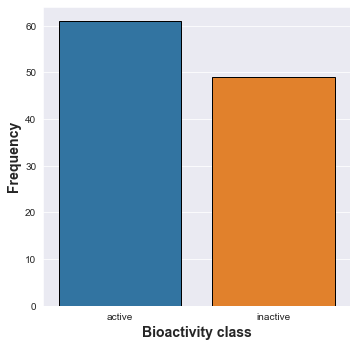

In [19]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [ ]:
There is just a slight imbalance in ours

### **Scatter plot of Molecular Weight versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces, evidenced by the scatter plot of MW vs LogP.

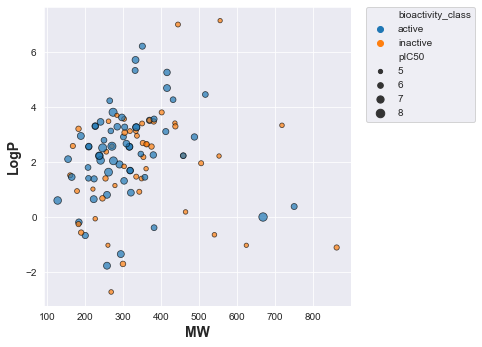

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### Outlier Detection | Box Plots

#### **pIC50 value**

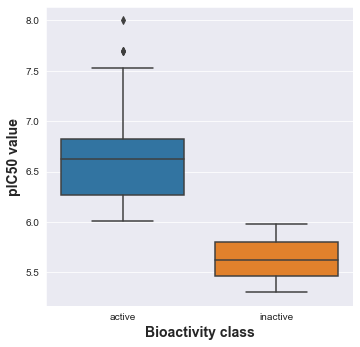

In [21]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

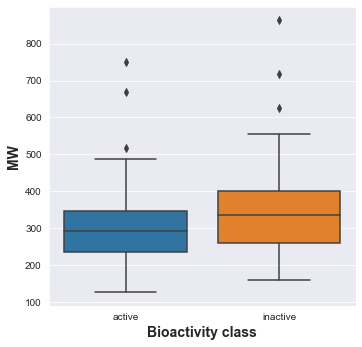

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

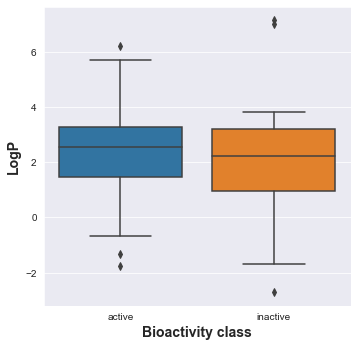

In [23]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

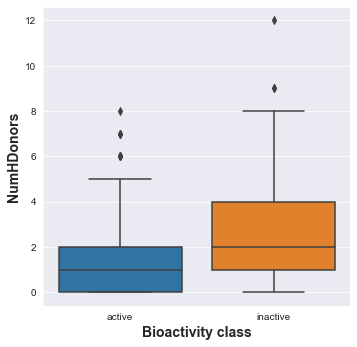

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

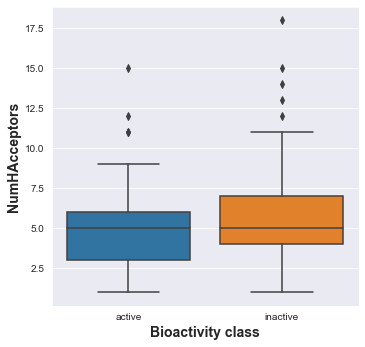

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

So, we have outliers in all our box plots. We are not going to drop them.

### Data Distributions

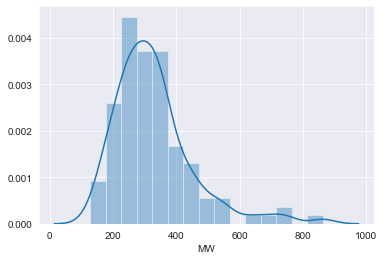

In [27]:
sns.distplot(df_final['MW'])

Molecular Weight almost have a normal distribution. I am saying almost because a lot of the observations are pretty much between 2 standard deviations. But the verdict is, the distribution has a right skew. This is evidenced by the location of the mode, which is further off on the left.

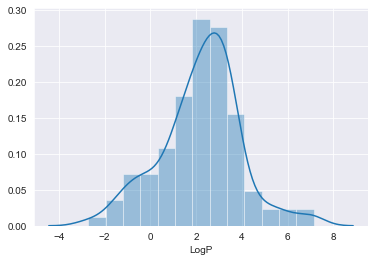

In [28]:
sns.distplot(df_final['LogP'])

The LogP values distribution have a slight left skew

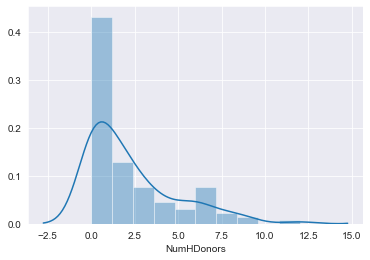

In [29]:
sns.distplot(df_final['NumHDonors'])

NumHDonors distribution have a right skew. See how further off to the left the mode is? Yes. It definetly right skewed or having positive skewness

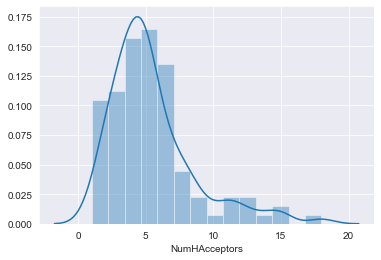

In [30]:
sns.distplot(df_final['NumHAcceptors'])

NumHAcceptors distribution have a right skew as well

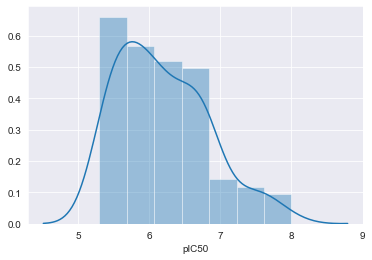

In [31]:
sns.distplot(df_final['pIC50'])

Hmmmmm. 🤔🤔🤔 This one is quite odd but pIC50 distribution also have a right skew.

## Statistical Analysis | Mann-Whitney U Test

I decided on this test for the following reasons:

1) We have outliers in our dataset which we cannot drop.

2) None of our distributions are normal.

3) Other than one distribution, with a left skew, all others are right skewed. Which is an assumption by the Mann-Whitney U Test that observations should not be normally distributed.Thus, compared to other non-parametric tests, it is the best fit for our project.



This custom function mannwhitney() will accept a lipinski descriptor as input and will:
* Split the values for that descriptor by the two classes we have in our dataset
* Conduct a statistical significance test on them
* Give back the results as a dataframe

In [32]:
def mannwhitney(descriptor, verbose=False):
# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [33]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.285674e-19,0.05,Different distribution (reject H0)


#### **MW**

In [34]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1163.5,0.023424,0.05,Different distribution (reject H0)


#### **LogP**

In [35]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1329.5,0.161251,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

In [36]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1011.5,0.001503,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

In [37]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1313.5,0.136429,0.05,Same distribution (fail to reject H0)


## Results Interpretation

##### Box Plots

###### pIC50 values

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 1000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 6 = Inactives``) were used to define actives and inactives.

###### Lipinski's descriptors

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), LogP and NumHAcceptors exhibited ***no difference*** between the **actives** and **inactives** while the other 2 descriptors (MW and NumHDonors) show ***statistically significant difference*** between **actives** and **inactives**.

It is worth noting that this analysis included several outliers for the features examined herein. They may have shifted the statistical power of the experiment, and therefore the differences found may be attributed to them. Since the results of this experiment are very critical, the outliers were not dropped. Although outliers do not modify the probability of Type I errors of the Mann-Whitney-Wilcoxon test, they nevertheless increase the probability of Type I1 errors and reduce power.

## **Zip files**

In [38]:
! zip -r results.zip . -i *.csv *.pdf

updating: bioactivity_preprocessed_data.csv (164 bytes security) (deflated 69%)
updating: mannwhitneyu_LogP.csv (164 bytes security) (deflated 7%)
updating: mannwhitneyu_MW.csv (164 bytes security) (deflated 7%)
updating: mannwhitneyu_NumHAcceptors.csv (164 bytes security) (deflated 10%)
updating: mannwhitneyu_NumHDonors.csv (164 bytes security) (deflated 10%)
updating: mannwhitneyu_pIC50.csv (164 bytes security) (deflated 9%)
updating: plot_bioactivity_class.pdf (164 bytes security) (deflated 40%)
updating: plot_ic50.pdf (164 bytes security) (deflated 39%)
updating: plot_LogP.pdf (164 bytes security) (deflated 41%)
updating: plot_MW.pdf (164 bytes security) (deflated 40%)
updating: plot_MW_vs_LogP.pdf (164 bytes security) (deflated 17%)
updating: plot_NumHAcceptors.pdf (164 bytes security) (deflated 41%)
updating: plot_NumHDonors.pdf (164 bytes security) (deflated 40%)
updating: bioactivity_raw_data.csv (164 bytes security) (deflated 89%)


### Export the dataset with pIC50 for use in part 3

In [40]:
df_final.to_csv('bioactivity_preprocessed_data_with_pIC50.csv', index=False)